# 1. Setting up

Import all required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits as digits
from sklearn import metrics

# 2. Inspecting the Data
We will look into identification of [digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) from images of the digits - a classic classification problem.

In [3]:
digits = digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


**Discussion:** What do you think each of the 64 features could be? (Hint: the digits dataset is a bunch of images of digits in range of 0 to 9)

Let's see how the first 5 samples look like.


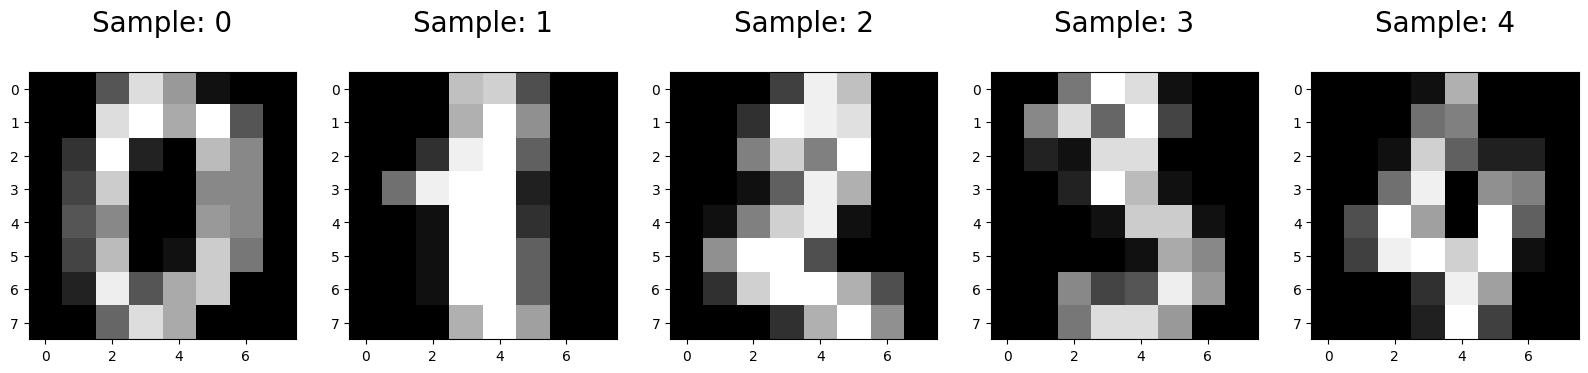

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Sample: %i\n' % label, fontsize = 20)

# 3. Pre-processing

Split the image data into a training and test set and then store the input and target data seperately for each set. Use [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.

In [5]:
# Split the data into a training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# 4. Creating and Training the Model

To create our logistic regression model, use [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from sklearn.

In [6]:
# all parameters not specified are set to their defaults
# TODO

# Returns a NumPy Array
# Predict for One Observation (image). 
# Take the first image in the test set to predict and print the prediction
# TODO

#Print the array of probability estimates for each possible class


Predict for Multiple Observations (images) at once. Take the first 10 images in the test set to predict. 

In [7]:
# TODO

Predict for the entire data set. 

In [8]:
# TODO

# 5. Measuring Classification Performance

Definitely show confusion matrix (explained in lecture), skip ROC curves.

Accuracy is defined as the fraction of correct predictions: correct predictions / total predictions

### Accuracy

In [9]:
# Use score method to get accuracy of model
score = # TODO
print(score)

SyntaxError: invalid syntax (3647788732.py, line 2)

**Discussion:** This looks like our model is doing well. But what is the baseline for a good model?


Now, let's try to use the Majority class classifier. Let's see what the majority class is in our training set.

In [ ]:
#Simple Code block imitating majority class classifier
vals, counts = np.unique(y_train, return_counts=True)
index = np.argmax(counts)
print("Majority Class: ", vals[index])

Now let's see how that predicts on our test set

In [ ]:
correct_count = 0
for y_val in y_test:
    if y_val == 4:
        correct_count += 1
print("Accuracy of Majority Class classifier: ", correct_count / len(y_test)) 

### Confusion Matrix

An unappealing matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

A matrix using Seaborn

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

A matrix using Matplotlib

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

NameError: name 'plt' is not defined

**Discussion:** What does the confusion matrix tell us about the performance of our linear regression model? What is the diagonal telling us? what are the values outside of the diagonal telling us?

# 6. Using GridSearch

Let's see how to use Grid Search find the best penalty and C parameters to train a Logistic Regression model. See the [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,100,1000]}
# create a logistic regression model
lr = LogisticRegression(solver='liblinear')
# initialize grid search on the logistic regression model
grid_lr = GridSearchCV(lr, param_grid=grid_values)
# fit your training data using grid search
grid_lr.fit(x_train, y_train)

now, we print the accuracy of our model. This accuracy is better than what we found in the previous model.

In [ ]:
lr_score = grid_lr.score(x_test, y_test)
print(lr_score)

Now, we predict on test set and save results to the variable **lr_y_pred**.

In [ ]:
lr_y_pred = grid_lr.predict(x_test)

And now, let's print its confusion matrix using sklearn.

In [ ]:
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr_score)
plt.title(all_sample_title, size = 15)

As you can see, GridSearch allowed us to tune the hyperparameters to achieve a higher accuracy. 

# 7. Tips
Let's do some brushing up on quick NumPy and Pandas commands. See the documentations: [argmax](https://)/[argmin ](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), [nlargest](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)/[nsmallest](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html). 

Everything has already been set up for you.

In [ ]:
# define numpy array
arr = np.array((23, 23, 55, 56, 10))

# TODO : find the minimum of the array and return the number

Great! Now let's see how we can use Pandas to find the greatest/least of a dataset.

In [ ]:
# initialize dataset.
data = {'Name':['Penny', 'Sebastian', 'Pam', 'Willy'], 'Nickname':['Penn', 'Seb', 'P', 'Will'], 'Age':[20, 21, 19, 18], 'Number of Pets':[2, 1, 3, 3]}
df = pd.DataFrame(data)

# view 
print(df)

        Name Nickname  Age  Number of Pets
0      Penny     Penn   20               2
1  Sebastian      Seb   21               1
2        Pam        P   19               3
3      Willy     Will   18               3


In [ ]:
# TODO : find the top 2 people who have the most number of pets and return their names.

# TODO : find the 3 people with the youngest ages and return their nicknames. 